In [2]:
pip install pulp

  Using cached PuLP-2.7.0-py3-none-any.whl (14.3 MB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pulp
from pulp import *

import numpy as np
import pandas as pd

import datetime
import matplotlib.pyplot as plt

## Load Data

In [61]:
df_distances = pd.read_csv('distances.csv')

df_ordersA = pd.read_csv('part2_ordersA.csv')
df_ordersB = pd.read_csv('part2_ordersB.csv')

In [62]:
df_distances.head()

,origin,destination,distance
0,Scarborough (Malvern / Rouge River),Scarborough (Rouge Hill / Port Union / Highlan...,3.931478
1,Scarborough (Malvern / Rouge River),Scarborough (Guildwood / Morningside / Ellesmere),4.864191
2,Scarborough (Malvern / Rouge River),Scarborough (Woburn),4.778347
3,Scarborough (Malvern / Rouge River),Scarborough (Cedarbrae),6.009861
4,Scarborough (Malvern / Rouge River),Scarborough (Eglinton),7.876162


In [63]:
df_ordersA

,restaurant,customer,estimated availability
0,Scarborough (Kennedy Park / Ionview / East Bir...,Scarborough (Woburn),2022-04-02 7:27 PM
1,Central Toronto (North Toronto West),Etobicoke (Westmount),2022-04-02 8:30 PM


In [64]:
df_ordersB

,restaurant,customer,estimated availability
0,Etobicoke (Islington Avenue),Downtown Toronto Stn A PO Boxes 25 The Esplana...,2022-04-02 5:17 PM
1,North York (Sweeney Park / Wigmore Park),Downtown Toronto (University of Toronto / Harb...,2022-04-02 5:49 PM
2,Scarborough (The Golden Mile / Clairlea / Oakr...,Downtown Toronto (Rosedale),2022-04-02 6:17 PM
3,Etobicoke (Westmount),Etobicoke (West Deane Park / Princess Gardens ...,2022-04-02 5:53 PM


## Sets

In [65]:
starting_location = 'Downtown Toronto (Rosedale)'
average_velocity = 40 # Km/Hr
average_wait = 5 # Mins

# Convert to Km/Min
velocity_min = average_velocity / 60

In [105]:
# Route A or B
route = 'A'

# Route variables
W = 55
test_W = range(0, 120, 5)

if route == 'A':
    print('Route A')
    df = df_ordersA
    start_time = pd.to_datetime('2022-04-02 19:00:00')
else:
    print('Route B')
    df = df_ordersB
    start_time = pd.to_datetime('2022-04-02 17:00:00')

Route A


In [67]:
# Get start and end locations
start_locations = list(df['restaurant'].unique()) + list(df['customer'].unique())
end_locations = list(df['restaurant'].unique()) + list(df['customer'].unique())

start_locations.append(starting_location)

start_locations = list(dict.fromkeys(start_locations))
end_locations = list(dict.fromkeys(end_locations))

# Calculate the number of stops 
num_stops = np.arange(0, len(end_locations)).tolist()

In [68]:
# Get unique Restraurants and Customers
restaurants = df['restaurant'].unique().tolist()
customers = df['customer'].unique().tolist()

In [69]:
restaurants

['Scarborough (Kennedy Park / Ionview / East Birchmount Park)',
 'Central Toronto (North Toronto West)']

In [70]:
customers

['Scarborough (Woburn)', 'Etobicoke (Westmount)']

In [71]:
list_order = []
for index, row in df.iterrows():
    list_order.append([row["restaurant"], row["customer"]])
print(list_order)

[['Scarborough (Kennedy Park / Ionview / East Birchmount Park)', 'Scarborough (Woburn)'], ['Central Toronto (North Toronto West)', 'Etobicoke (Westmount)']]


In [72]:
travel_distance = {}

# Distance between start location and end location
for i in start_locations:
    for j in end_locations: 
        if i == j:
            travel_distance[(i,j)] = 0 
        else:
            travel_distance[(i,j)] = float(df_distances[(df_distances['origin'] == i) & 
                                                          (df_distances['destination'] == j)]['distance'])

In [73]:
travel_distance

{('Scarborough (Kennedy Park / Ionview / East Birchmount Park)',
  'Scarborough (Kennedy Park / Ionview / East Birchmount Park)'): 0,
 ('Scarborough (Kennedy Park / Ionview / East Birchmount Park)',
  'Central Toronto (North Toronto West)'): 11.588337107941916,
 ('Scarborough (Kennedy Park / Ionview / East Birchmount Park)',
  'Scarborough (Woburn)'): 6.082790237548605,
 ('Scarborough (Kennedy Park / Ionview / East Birchmount Park)',
  'Etobicoke (Westmount)'): 21.91860177095576,
 ('Central Toronto (North Toronto West)',
  'Scarborough (Kennedy Park / Ionview / East Birchmount Park)'): 11.588337107941916,
 ('Central Toronto (North Toronto West)',
  'Central Toronto (North Toronto West)'): 0,
 ('Central Toronto (North Toronto West)',
  'Scarborough (Woburn)'): 16.67863033379712,
 ('Central Toronto (North Toronto West)',
  'Etobicoke (Westmount)'): 10.339861856017103,
 ('Scarborough (Woburn)',
  'Scarborough (Kennedy Park / Ionview / East Birchmount Park)'): 6.082790237548605,
 ('Scarbor

In [74]:
travel_time = {}

# Time between start location and end location           
for i in start_locations:
    for j in end_locations: 
        # If at location, no wait unless it is the customer 
        if i == j:
            if i in customers:
                travel_time[(i,j)] = average_wait
            else: 
                travel_time[(i,j)] = 0 
        # Calculate travel time
        else: 
            if i in customers:
                # Driver waits 5 minutes for customer to pick up order
                travel_time[(i,j)] = travel_distance[(i,j)] * velocity_min + average_wait
            else:
                # Not at a customer location so no wait
                travel_time[(i,j)] = travel_distance[(i,j)] * velocity_min    

In [75]:
travel_time

{('Scarborough (Kennedy Park / Ionview / East Birchmount Park)',
  'Scarborough (Kennedy Park / Ionview / East Birchmount Park)'): 0,
 ('Scarborough (Kennedy Park / Ionview / East Birchmount Park)',
  'Central Toronto (North Toronto West)'): 7.725558071961277,
 ('Scarborough (Kennedy Park / Ionview / East Birchmount Park)',
  'Scarborough (Woburn)'): 4.05519349169907,
 ('Scarborough (Kennedy Park / Ionview / East Birchmount Park)',
  'Etobicoke (Westmount)'): 14.612401180637173,
 ('Central Toronto (North Toronto West)',
  'Scarborough (Kennedy Park / Ionview / East Birchmount Park)'): 7.725558071961277,
 ('Central Toronto (North Toronto West)',
  'Central Toronto (North Toronto West)'): 0,
 ('Central Toronto (North Toronto West)',
  'Scarborough (Woburn)'): 11.11908688919808,
 ('Central Toronto (North Toronto West)',
  'Etobicoke (Westmount)'): 6.893241237344736,
 ('Scarborough (Woburn)',
  'Scarborough (Kennedy Park / Ionview / East Birchmount Park)'): 9.05519349169907,
 ('Scarborough

In [76]:
minimum_arrival = {}

for i in end_locations:
    # Customer has no wait
    if i in customers: 
        minimum_arrival[i] = 0 
        
    # Restaurant has wait time 
    if i in restaurants:
        temp = pd.to_datetime(df.loc[df['restaurant'] == i]['estimated availability'].tolist()[0]) - start_time
        # Conver to minutes
        minimum_arrival[i] = temp / datetime.timedelta(minutes=1)

In [77]:
minimum_arrival

{'Scarborough (Kennedy Park / Ionview / East Birchmount Park)': 27.0,
 'Central Toronto (North Toronto West)': 90.0,
 'Scarborough (Woburn)': 0,
 'Etobicoke (Westmount)': 0}

## Model Setup

In [78]:
model = LpProblem(name = 'Model', sense = LpMinimize)

xVar = LpVariable.dict('x', (start_locations, end_locations, num_stops), cat = LpBinary)
zVar = LpVariable.dict('z', num_stops, lowBound = 0.0, cat = LpContinuous)
dVar = LpVariable.dict('d', num_stops, lowBound = 0.0, cat = LpContinuous)
wVar = LpVariable.dict('w', (start_locations, num_stops), lowBound = 0.0, cat = LpContinuous)

In [81]:
obj = lpSum([travel_distance[(i,j)] * xVar[(i,j,t)] for i in start_locations for j in end_locations for t in num_stops])
model += obj

## Constraints

In [106]:
# 1. Convervation of flow
for t in num_stops[:-1]:
    for j in end_locations:
        model += (lpSum([xVar[(i,j,t)] for i in start_locations]) == lpSum([xVar[(j,k,t+1)] for k in end_locations]))

# 2. Every location is visited once
for j in end_locations: 
    model += lpSum([xVar[(i,j,t)] for i in start_locations for t in num_stops]) == 1
    
# 3. First node has an outflow of 1, others 0
for i in start_locations:
    if i == starting_location:
        model += lpSum([xVar[(i,j,0)] for j in end_locations]) == 1
    else: 
        model += lpSum([xVar[(i,j,0)] for j in end_locations]) == 0

# 4. Visit restaurant before customer
def restaurant_customer_match(customer):
    for order in list_order:
        if customer == order[1]:
            return order[0]

for t in num_stops: 
    for j in end_locations: 
        if j in customers: 
            model += pulp.lpSum( [xVar[i,j,t] for i in start_locations]) <= pulp.lpSum([xVar[i, restaurant_customer_match(j),t_] for i in start_locations for t_ in num_stops[:t]])
            
# 5. Time to arrive at the location of the t-th step
for t in num_stops:
    if t == 0: 
        model += dVar[t] == lpSum([ xVar[(i,j,0)] * minimum_arrival[j] for i in start_locations for j in end_locations])
    else:
        model += dVar[t] >= (dVar[t-1] + lpSum([ xVar[(i,j,t)] * travel_time[(i,j)] for i in start_locations for j in end_locations]))
        
# 6. If arriving at location j, ensures time is at least minimum arrival time (Ij)
for i in start_locations:
    for j in end_locations:
        for t in num_stops:
            model += dVar[t] >= xVar[i,j,t] * minimum_arrival[j]
          
        
# 7. Add wait time of order per stop
for j in end_locations:
    for t in num_stops:
        if j in restaurants:
            model += wVar[(j,t)]  == 0
        else:
            model += wVar[(j,t)] == dVar[t] - lpSum([minimum_arrival[restaurant_customer_match(j)] * xVar[(i,j,t)] for i in start_locations])

# 7. If arriving at location j, ensures time is at most maximum arrival time (uj)      
# Formula Dt <= uj xijt + M(1-xijt)
M = 1000
for i in start_locations:
    for j in end_locations:
        for t in num_stops:
            if t == 0:
                model += zVar[t] == 0 
            elif t == 1:
                model += zVar[t] >= wVar[j,t] - M * (1 - xVar[(i,j,t)])
                model += zVar[t] <= wVar[j,t] + M * (1 - xVar[(i,j,t)])
            else: 
                model += zVar[t] >= zVar[t-1] + wVar[(j,t)] - M * (1 - xVar[(i,j,t)])
                model += zVar[t] <= zVar[t-1] + wVar[(j,t)] + M * (1 - xVar[(i,j,t)])

# 8. Time does not exceed max waiting time
for t in num_stops:
     model += zVar[t] <= W * len(customers)

## Solve

In [107]:
# Solve the model
model.solve()
print("Status:", LpStatus[model.status])

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/597b8ae48806458597ae7041c9b866a1-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/597b8ae48806458597ae7041c9b866a1-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 672 COLUMNS
At line 3458 RHS
At line 4126 BOUNDS
At line 4207 ENDATA
Problem MODEL has 667 rows, 104 columns and 2561 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 12.795 - 0.00 seconds
Cgl0002I 18 variables fixed
Cgl0003I 34 fixed, 0 tightened bounds, 110 strengthened rows, 6 substitutions
Cgl0003I 4 fixed, 0 tightened bounds, 22 strengthened rows, 6 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 9 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 tightened bounds, 34 strengthened rows, 0 substitutions
Cgl0003I 0 fixed, 0 ti

In [108]:
# Total Distance
total_distance = pulp.value(model.objective)
print("Total Distance: " , total_distance)

Total Distance:  42.7683943351618


In [109]:
# Print the results
path=[]
for t in num_stops:
    print(f'step:{t}\n')
    for i in start_locations:
         for j in end_locations:
                if (xVar[(i,j,t)].varValue == 1) :
                    print(f"TRAVEL FROM {i}  TO {j}")
                    print("\tWAITING TIME: " + str(wVar[(j,t)].varValue))
                    print("\tTOTAL WAITING TIME: " + str(zVar[t].varValue))
                    
                    if i not in path:
                        path.append(i)
                    if j not in path:
                        path.append(j)
print("\nAVERAGE WAITING TIME: " + str(zVar[t].varValue/len(customers)))

step:0

TRAVEL FROM Downtown Toronto (Rosedale)  TO Central Toronto (North Toronto West)
	WAITING TIME: 0.0
	TOTAL WAITING TIME: 0.0
step:1

TRAVEL FROM Central Toronto (North Toronto West)  TO Etobicoke (Westmount)
	WAITING TIME: 6.8932412
	TOTAL WAITING TIME: 6.8932412
step:2

TRAVEL FROM Etobicoke (Westmount)  TO Scarborough (Kennedy Park / Ionview / East Birchmount Park)
	WAITING TIME: 0.0
	TOTAL WAITING TIME: 6.8932412
step:3

TRAVEL FROM Scarborough (Kennedy Park / Ionview / East Birchmount Park)  TO Scarborough (Woburn)
	WAITING TIME: 93.560836
	TOTAL WAITING TIME: 100.45408

AVERAGE WAITING TIME: 50.22704


## Optimal W

In [110]:
def get_distance(W):
    model = LpProblem(name = "optimal_W", sense = LpMinimize)

    # 1. Convervation of flow
    for t in num_stops[:-1]:
        for j in end_locations:
            model += (lpSum([xVar[(i,j,t)] for i in start_locations]) == lpSum([xVar[(j,k,t+1)] for k in end_locations]))

    # 2. Every location is visited once
    for j in end_locations: 
        model += lpSum([xVar[(i,j,t)] for i in start_locations for t in num_stops]) == 1

    # 3. First node has an outflow of 1, others 0
    for i in start_locations:
        if i == starting_location:
            model += lpSum([xVar[(i,j,0)] for j in end_locations]) == 1
        else: 
            model += lpSum([xVar[(i,j,0)] for j in end_locations]) == 0

    # 4. Visit restaurant before customer
    for t in num_stops: 
        for j in end_locations: 
            if j in customers: 
                temp = restaurant_customer_match(j)
                model += lpSum( [xVar[i,j,t] for i in start_locations]) <= lpSum([xVar[i,temp,k] for i in start_locations for k in num_stops[:t]])

    # 5. Time to arrive at the location of the t-th
    for t in num_stops:
        if t == 0: 
            model += dVar[t] == lpSum([ xVar[(i,j,0)] * minimum_arrival[j] for i in start_locations for j in end_locations])
        else:
            model += dVar[t] >= (dVar[t-1] + lpSum([ xVar[(i,j,t)] * travel_time[(i,j)] for i in start_locations for j in end_locations]))

    # 6. Constraint: if arriving at location j, ensures time is at least the min_arrival_time_mins
    for i in start_locations:
        for j in end_locations:
            for t in num_stops:
                model += dVar[t] >= xVar[i,j,t] * minimum_arrival[j]


    # 7. Constraint: define waiting time of each order at num_stops t: wVar[j,t]
    for t in num_stops:
        for j in end_locations:
            if j in restaurants:
                model += wVar[(j,t)]  == 0
            else:
                model += wVar[(j,t)] == dVar[t] - lpSum([minimum_arrival[restaurant_customer_match(j)] * xVar[(i,j,t)] for i in start_locations])

    # If arriving at location j, ensures time is at most maximum arrival time (uj)        
    # Formula Dt <= uj xijt + M(1-xijt)
    M = 10000
    for i in start_locations:
        for j in end_locations:
            for t in num_stops:
                if t == 0:
                    model += zVar[t] == 0 
                elif t == 1:
                    model += zVar[t] >= wVar[j,t] - M * (1 - xVar[(i,j,t)])
                    model += zVar[t] <= wVar[j,t] + M * (1 - xVar[(i,j,t)])
                else: 
                    model += zVar[t] >= zVar[t-1] + wVar[(j,t)] - M * (1 - xVar[(i,j,t)])
                    model += zVar[t] <= zVar[t-1] + wVar[(j,t)] + M * (1 - xVar[(i,j,t)])

    # 8. Time does not exceed max waiting time
    for t in num_stops:
         model += zVar[t] <= W * len(customers)
            
    obj = lpSum([travel_distance[(i,j)] * xVar[(i,j,t)] for i in start_locations for j in end_locations for t in num_stops])
    model += obj
    
    optimal = model.solve()

    if optimal == 1:
        return value(model.objective)
    else:
        return 0 

In [111]:
different_w_distances = []

for W in test_W:
    different_w_distances.append(get_distance(W))

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /opt/conda/lib/python3.10/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/8a649221165a4ff98386219bd1488e03-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/8a649221165a4ff98386219bd1488e03-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 278 COLUMNS
At line 1530 RHS
At line 1804 BOUNDS
At line 1885 ENDATA
Problem MODEL has 273 rows, 104 columns and 1027 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 12.795 - 0.00 seconds
Cgl0002I 18 variables fixed
Cgl0003I 37 fixed, 0 tightened bounds, 0 strengthened rows, 0 substitutions
Cgl0000I Cut generators found to be infeasible! (or unbounded)
Pre-processing says infeasible or unbounded
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00

Welcome to the CBC

Text(0.5, 1.0, 'Trade-off Curve')

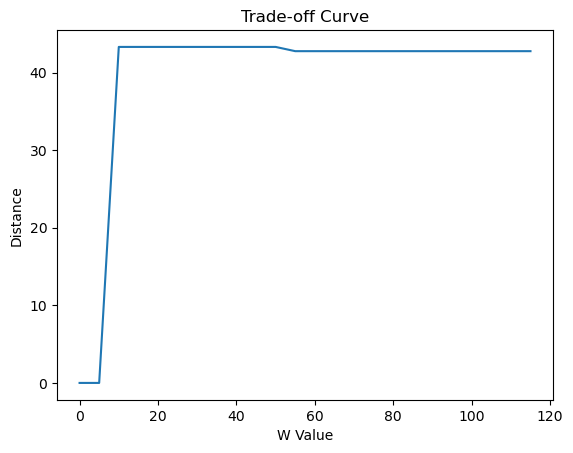

In [112]:
plt.plot(test_W, different_w_distances)
plt.xlabel("W Value")
plt.ylabel("Distance")
plt.title("Trade-off Curve")